# A9.1 Probability Simulation - generating page vist duration data

By Yi-Chi Liao (yi-chi.liao@aalto.fi)       

Feel free to contact me if there's any questions.

In this assignment, we want to simulate the overall duration for a user to visit a particular webpage, such a duration is also known as page visit duration. You need to create a model include several elements so the model is able to generate realisitc data.  

Our model is a simplified version of [Keystroke-Level Model](https://en.wikipedia.org/wiki/Keystroke-level_model) (KLM); in the original KLM, there are 6 components to estimate a duration of a certain interaction, which are:  
- K (key stroke or button press): is the time for pressing a button.
- P (pointing): time for doing a pointing task.
- H (homing): time for moving the hand to the input device.
- D (drawing): time for drawing any strokes
- M (mental): mentally preparing to do any task.
- R (responding): time for the system to respond to user's input.
 
 
For our example webpage, we assume the user only needs to observe some interesting targets every now and then, and moves the cursor there and clicks it. Hence, our model hass only 3 components: **P (time for moving a cursor from current location to the target button)**, **K (time for pressing a button)**, and **the duration between each time he/she finds an interestet target**. 

For example, a user enters the webpage, after **3 seconds** of browsing, he/she finds one interesting target, and spends **0.5 seconds** to move the cursor there and spends **0.1 second** to click it, then leaves the webpage. In total, he spends **3.6 seconds** in the webpage, this is the page visit duration for this user. 

## Task 9.1.1

For the first task, let's assume we have no actual user data as a reference, all you need to do is making assumptions and using numpy package to generate random data. However, some rules are given for you to make reasonable estimates.   

First, we already know that every user will find 1 ~ 20 interesting targets on this website, and the all the possible target amount share the same probability. 

Second, when every new target pops up, we assume the target distance is a uniform distribution ranging from 0 to 10 cm away; also, the target width is uniform distribution, too, ranging from 0 to 1 cm. 

Based on the distance and width, we know how to estimate the movement time according to [fitts' law](https://en.wikipedia.org/wiki/Fitts's_law):

$$ \begin{equation} MT = a + b \times \log_2\left(\frac{2D}{W}\right) \end{equation}    $$ 

where D is the target distance (unit: cm), W is the target width (unit: cm), and MT is the movement time (unit: millisecond). 

The equation basically states that if we know the width (W) and distance (D) of this target, we can roughly estimate the time for moving your cursor from current position to therem that is, our time P in the KLM model. For the following task, the a and b coefficients of Fitts' law will be given (as calculated by [Prof. Scott I. MacKenzie's paper](https://www.yorku.ca/mack/hhci2018.html)).   
Fitts' law will produce deterministic estimation, a set of <distance, width> of the target will always lead to the same pointing time. This is, however, unlike actual human's performance. To make it more natural, we can add a very small Gaussian distributed noise, so that even the same target is shown twice, the resulting performance will be slightly different.

Thirdly, we assume the interval for a user to find next interesting target is a normal distributed random function with a 4000 milliseconds mean value. We also assume the clicking time is another normal distributed probability with a 50 milliseconds mean value.

Please follow the above rules to create a model.

**Environment requirements: numpy and matplotlib**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fitts_a = 12.8 ## Fitts' law coefficient a 
fitts_b = 94.7 ## Fitts' law coefficient b

# The movement time can be calculated:
# MT = a + b * log(2D/W)   ---  D and W with unit cm, and MT is in millisecond

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points
    n = len(data)

    # x-data for the ECDF
    x = np.sort(data)

    # y-data for the ECDF
    y = np.arange(1, n+1) / n

    return x, y

In [2]:
### Write down your answer 

def number_of_targets ():
    n = ____  # Generate a number (how many target does this user find) from A uniform distribution
    return n
    
def pointing_time_generator (n=1):
    fitts_width = ____     # Generate target width(s) in unit cm
    fitts_distance = ____  # Generate target distance(s) in unit cm
    pointing_time = ____   # Calculate the pointing time (movement time) for this target
    # Add some Gaussian noise to make more realistic data
    return pointing_time
    
def waiting_time_generator (n=1):
    w_time = ____   # Generate waiting time for each target from a normal distribution
    return w_time
    
def keystroke_time_generator (n=1):
    k_time = ____   # Generate button-click time for each target from a normal distribution
    return k_time
    
def page_visit_duration_model(sample=1):
    page_visit_duration = []
    
    # Each sample is a simulated user's total page visit duration
    for i in range (sample):
        ## TODO: Fill your code here
        
        page_visit_duration.append (visit_duration/1000)  # millisecond to second
    return page_visit_duration

In [3]:
#### Suggested answer 
def number_of_targets ():
    n = int(np.random.uniform(1,20,1))
    if (n==0):
        n= 1
    return n
    
def pointing_time_generator (n=1):
    fitts_width = np.random.uniform(0,1,n)
    fitts_distance = np.random.uniform(0,10,n)
    pointing_time = fitts_a + fitts_b * np.log(2*fitts_distance/fitts_width)
    pointing_noise = np.random.normal(0,0.5,n)
    pointing_time += pointing_noise
    for i in pointing_time:
        if i < 0:
            i = 0
    return pointing_time
    
def waiting_time_generator (n=1):
    w_time = np.random.normal(4000,200,n)
    for i in w_time:
        if (i<0):
            i = 0
    return (w_time)
    
def keystroke_time_generator (n=1):
    k_time = np.random.normal (50,0.1,n)
    for i in k_time:
        if (i<0):
            i = 0
    return (k_time)
    
def page_visit_duration_model(sample=1):
    page_visit_duration = []
    for i in range (sample):
        n_targets = number_of_targets()
        w_time = waiting_time_generator(n_targets)
        p_time = pointing_time_generator(n_targets)
        k_time = keystroke_time_generator(n_targets)
        visit_duration = np.sum(w_time) + np.sum(p_time) + np.sum(k_time)
        page_visit_duration.append (visit_duration/1000)
    return page_visit_duration

In [4]:
# Simulating 1 user's page visit duration
one_visit_duration = page_visit_duration_model()
print (one_visit_duration)

[38.93830691650146]


Let's see the distribution of the results with 100 and 5000 samples:

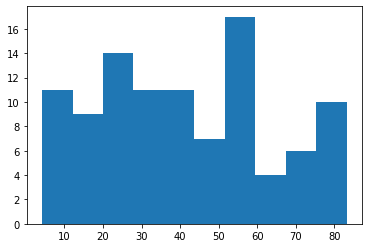

In [5]:
visit_durations = page_visit_duration_model(100)
plt.hist(visit_durations,bins=10);

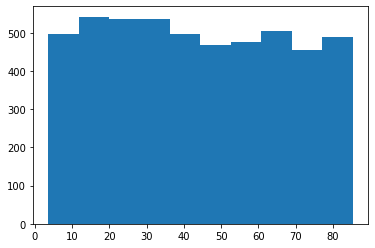

In [6]:
visit_durations = page_visit_duration_model(5000)
plt.hist(visit_durations,bins=10);

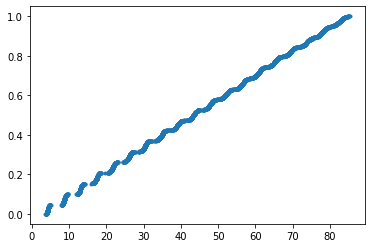

In [7]:
# Generate x- and y-data for the ECDF
x_visit, y_visit = ecdf(visit_durations)

# Plot the ECDF
plt.plot(x_visit, y_visit, marker='.', linestyle='none');

**Question: (Directly write down your answer below)**
- What distribution do you think is the estimated page visit durations given enough samples? Why?

**Answer:**
(Suggested answer: Uniform distribution. The target amount is a uniform distributed probability, and it is the donimating factor of the page limit time.)

## Task 9.1.2

Now we assume the user's interested target is not a uniformly distributed probability, but a normally distributed one (mean 10). How will the final distribution of page visit durations look like?

In [8]:
def number_of_targets ():
    n = ____  # Generate a number (how many target does this user find) from A normal distribution
    return n

In [9]:
### Suggested answer

def number_of_targets ():
    n = int(np.random.normal(10,2))
    return n

Let's again plot all the estimated page visit durations:

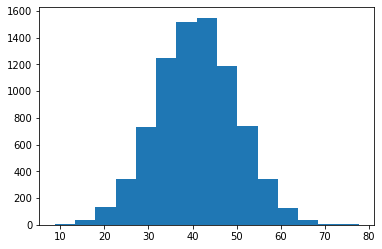

In [10]:
visit_durations = page_visit_duration_model(8000)
plt.hist(visit_durations,bins=15)
plt.show()

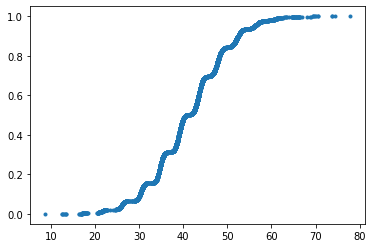

In [11]:
# Plot the ECDF
x_visit, y_visit = ecdf(visit_durations)
plt.plot(x_visit, y_visit, marker='.', linestyle='none');

**Question: (Directly write down your answer below)**
- What distribution do you think now? Why?

**Answer:**
(Normal distribution, same reason)

## Task 9.1.3

Now we have some actual users' data which only logged the interested targets they found. The data is shown below:

In [12]:
acutal_user_target_number = [6, 6, 5, 7, 5, 5, 10, 8, 9, 8, 10, 5, 5, 8, 5, 10, 12, 
                             12, 8, 9, 5, 4, 4, 8, 5, 4, 10, 3, 5, 4, 2, 9, 7, 5, 6, 
                             7, 3, 9, 6, 5, 4, 8, 6, 7, 6, 6, 9, 6, 8, 4, 5, 5, 10, 
                             3, 11, 6, 4, 7, 8, 5, 7, 4, 6, 5, 10, 5, 6, 10, 11, 8, 2, 
                             6, 6, 15, 7, 6, 7, 9, 12, 13, 7, 4, 8, 8, 6, 8, 6, 4, 5, 
                             3, 8, 7, 5, 5, 4, 9, 8, 7, 4, 7]

Please estimate the distribution of the data, and using the parameters of the distribution to update your model.

In [13]:
### Check what is the distribution and justify why

In [14]:
### Update your number_of_targets functions according to your estimation of the distribution
def number_of_targets ():
    n = ____  # Generate a number (how many target does this user find)
    return n

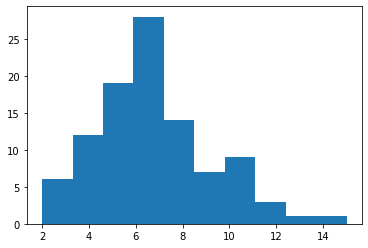

In [15]:
### A part of Suggested answer
# They have to plot the distribution and find a long tail => Poisson distribution
plt.hist(acutal_user_target_number,bins=10);

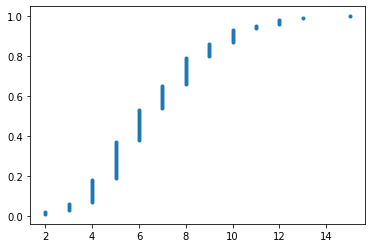

In [16]:
### A part of Suggested answer
# They have to plot the distribution and find a long tail => Poisson distribution
x_visit, y_visit = ecdf(acutal_user_target_number)
plt.plot(x_visit, y_visit, marker='.', linestyle='none');

In [17]:
# Poisson distribution has only one parameter, which is mean. 
# Since Poisson distribution is DISCRETE, they should conclude that the mean is 7 (we can also accept 6)

print (np.mean(np.array(acutal_user_target_number)))

6.7


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [mu_distribution]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


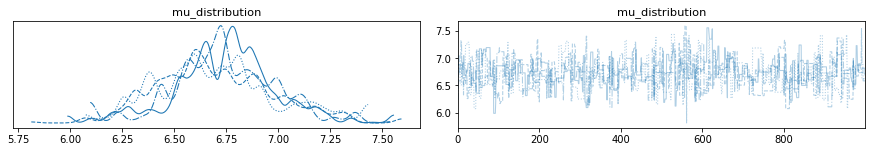

/usr/local/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu_distribution,6.722,0.264,6.217,7.213,0.012,0.009,460.0,457.0,462.0,516.0,1.02


In [18]:
### Alternative answer - PYMC3 approach
### If they want, they can use PyMC3 to infer the model 
### The code is as such.

import pymc3 as pm
with pm.Model() as number_of_targets_model: 
    
    # They can use either Uniform or DiscreteUniform as prior
    mu_distribution = pm.Uniform('mu_distribution', 0, 20)
    #mu_distribution = pm.DiscreteUniform('mu_distribution', 0, 20) ## DiscreteUniform is actaully a preferred answer
    
    ### Make sure that they use Poisson distrubition as likelihood, not Binomial or Normal
    like = pm.Poisson('likelihood', mu=mu_distribution,
                      observed=acutal_user_target_number)  
    
    step = pm.Metropolis()
    number_of_targets_trace = pm.sample(1000, step=step,cores=4)
    
pm.traceplot(number_of_targets_trace)
plt.show()
pm.summary(number_of_targets_trace)

In [19]:
### Suggested answer 
### Now they use the new estimated parameter to update the model

def number_of_targets ():
    n = np.random.poisson(7)
    return n

Let's again plot all the estimated page visit durations:

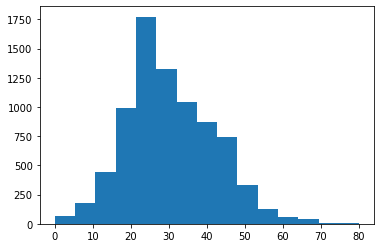

In [20]:
visit_durations = page_visit_duration_model(8000)
plt.hist(visit_durations,bins=15)
plt.show()

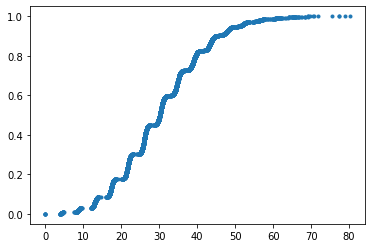

In [21]:
# Plot the ECDF
x_visit, y_visit = ecdf(visit_durations)
plt.plot(x_visit, y_visit, marker='.', linestyle='none');

**Question: (Directly write down your answer below)**
- What distribution do you think now? Why?

**Answer:**
(Poisson distribution, same reason)